In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('dataset/salesdaily.csv', parse_dates=['datum'])
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [4]:
df['Hour'].unique()

array([248, 276, 190])

In [5]:
df['Day'] = df['datum'].dt.day

In [6]:
df.columns

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06', 'Year', 'Month', 'Hour', 'Weekday Name', 'Day'],
      dtype='object')

In [7]:
# df.drop(columns='Hour', inplace=True)

In [8]:
melted_df = pd.melt(df, id_vars=['datum', 'Year', 'Month', 'Weekday Name', 'Day', 'Hour'], 
                    var_name='drug', value_name='sales')

In [9]:
melted_df.rename(columns={'datum':'DateTime'}, inplace=True)


In [10]:
melted_df.head()

,DateTime,Year,Month,Weekday Name,Day,Hour,drug,sales
0,2014-01-02,2014,1,Thursday,2,248,M01AB,0.0
1,2014-01-03,2014,1,Friday,3,276,M01AB,8.0
2,2014-01-04,2014,1,Saturday,4,276,M01AB,2.0
3,2014-01-05,2014,1,Sunday,5,276,M01AB,4.0
4,2014-01-06,2014,1,Monday,6,276,M01AB,5.0


In [11]:
melted_df.groupby('drug')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
drug,,,,,,,,
M01AB,2106.0,5.033683,2.737579,0.0,3.00,4.99,6.670,17.340000
M01AE,2106.0,3.895830,2.133337,0.0,2.34,3.67,5.138,14.463000
N02BA,2106.0,3.880441,2.384010,0.0,2.00,3.50,5.200,16.000000
N02BE,2106.0,29.917095,15.590966,0.0,19.00,26.90,38.300,161.000000
N05B,2106.0,8.853627,5.605605,0.0,5.00,8.00,12.000,54.833333
N05C,2106.0,0.593522,1.092988,0.0,0.00,0.00,1.000,9.000000
R03,2106.0,5.512262,6.428736,0.0,1.00,4.00,8.000,45.000000
R06,2106.0,2.900198,2.415816,0.0,1.00,2.00,4.000,15.000000


In [12]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16848 entries, 0 to 16847
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      16848 non-null  datetime64[ns]
 1   Year          16848 non-null  int64         
 2   Month         16848 non-null  int64         
 3   Weekday Name  16848 non-null  object        
 4   Day           16848 non-null  int32         
 5   Hour          16848 non-null  int64         
 6   drug          16848 non-null  object        
 7   sales         16848 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(2)
memory usage: 987.3+ KB


In [13]:
melted_df['DateTime'].min(), melted_df['DateTime'].max()

(Timestamp('2014-01-02 00:00:00'), Timestamp('2019-10-08 00:00:00'))

In [14]:
melted_df['time_indx'] = (melted_df['DateTime'] - melted_df['DateTime'].min()).dt.days

In [15]:
melted_df.head()

,DateTime,Year,Month,Weekday Name,Day,Hour,drug,sales,time_indx
0,2014-01-02,2014,1,Thursday,2,248,M01AB,0.0,0
1,2014-01-03,2014,1,Friday,3,276,M01AB,8.0,1
2,2014-01-04,2014,1,Saturday,4,276,M01AB,2.0,2
3,2014-01-05,2014,1,Sunday,5,276,M01AB,4.0,3
4,2014-01-06,2014,1,Monday,6,276,M01AB,5.0,4


In [16]:
# Create a set of all expected 'time_idx' values from 0 to the maximum value
expected_time_index = set(range(melted_df['time_indx'].max() + 1)) 
# Convert 'time_idx' column to a set
actual_time_index = set(melted_df['time_indx'])
# Find the missing values in 'time_idx' range
missing_time_idx = expected_time_index - actual_time_index
print(missing_time_idx)

set()


In [17]:
## year, month, weekday, day, and hour are categorical features so let's chaneg the datatype of these columns to object
melted_df['Year'] = melted_df['Year'].astype(str)
melted_df['Month'] = melted_df['Month'].astype(str)
melted_df['Weekday Name'] = melted_df['Weekday Name'].astype(str)
melted_df['Day'] = melted_df['Day'].astype(str)
melted_df['Hour'] = melted_df['Hour'].astype(str)

In [18]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16848 entries, 0 to 16847
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      16848 non-null  datetime64[ns]
 1   Year          16848 non-null  object        
 2   Month         16848 non-null  object        
 3   Weekday Name  16848 non-null  object        
 4   Day           16848 non-null  object        
 5   Hour          16848 non-null  object        
 6   drug          16848 non-null  object        
 7   sales         16848 non-null  float64       
 8   time_indx     16848 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [19]:
df = melted_df
df.reset_index(inplace=True)
df.head()

,index,DateTime,Year,Month,Weekday Name,Day,Hour,drug,sales,time_indx
0,0,2014-01-02,2014,1,Thursday,2,248,M01AB,0.0,0
1,1,2014-01-03,2014,1,Friday,3,276,M01AB,8.0,1
2,2,2014-01-04,2014,1,Saturday,4,276,M01AB,2.0,2
3,3,2014-01-05,2014,1,Sunday,5,276,M01AB,4.0,3
4,4,2014-01-06,2014,1,Monday,6,276,M01AB,5.0,4


In [20]:
from pytorch_forecasting import TimeSeriesDataSet, Baseline, TemporalFusionTransformer
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, QuantileLoss


from tqdm.autonotebook import tqdm
import warnings

warnings.filterwarnings("ignore") 

/home/fm-pc-lt-281/timeseries_env/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [21]:
max_prediction_length = 7
max_encoder_length = 28
training_cutoff = df['DateTime'].max() - pd.DateOffset(days=max_prediction_length)

In [22]:
training_cutoff

Timestamp('2019-10-01 00:00:00')

In [23]:
df[lambda x: x.DateTime <= training_cutoff]

,index,DateTime,Year,Month,Weekday Name,Day,Hour,drug,sales,time_indx
0,0,2014-01-02,2014,1,Thursday,2,248,M01AB,0.0,0
1,1,2014-01-03,2014,1,Friday,3,276,M01AB,8.0,1
2,2,2014-01-04,2014,1,Saturday,4,276,M01AB,2.0,2
3,3,2014-01-05,2014,1,Sunday,5,276,M01AB,4.0,3
4,4,2014-01-06,2014,1,Monday,6,276,M01AB,5.0,4
...,...,...,...,...,...,...,...,...,...,...
16836,16836,2019-09-27,2019,9,Friday,27,276,R06,4.0,2094
16837,16837,2019-09-28,2019,9,Saturday,28,276,R06,3.0,2095
16838,16838,2019-09-29,2019,9,Sunday,29,276,R06,2.1,2096
16839,16839,2019-09-30,2019,9,Monday,30,276,R06,2.0,2097


In [24]:
df.shape[0] - 16792

56

In [25]:
7 * 8

56

In [26]:
dataset = TimeSeriesDataSet(
    df[lambda x: x.DateTime <= training_cutoff],
    time_idx="time_indx",
    target="sales",
    group_ids=['drug'],
    min_encoder_length=max_encoder_length,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=max_prediction_length,
    max_prediction_length=max_prediction_length,
    time_varying_known_categoricals=["Year", "Month", 'Weekday Name', 'Day'],
    time_varying_known_reals=['time_indx'],
    # time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=['sales'],
    # add_relative_time_idx=True,
    # add_target_scales=True,
    # add_encoder_length=True,
    # allow_missing_timesteps = True
)

In [27]:
# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
validation = TimeSeriesDataSet.from_dataset(dataset, df, predict=True, stop_randomization=True)


In [28]:
# create dataloaders for model
batch_size = 128  # set this between 32 to 128
train_dataloader = dataset.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

### Create a Baseline Model

In [29]:
# calculate baseline mean absolute error, i.e. predict next value as the last available value from thehistory
baseline_predictions = Baseline().predict(val_dataloader, return_y=True)
MAE()(baseline_predictions.output, baseline_predictions.y)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


tensor(6.2379)

### Train the Temporal Fusion Transformer

In [30]:

import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor


In [31]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    accelerator="cpu",
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
)


tft = TemporalFusionTransformer.from_dataset(
    dataset,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=8,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    loss=QuantileLoss(),
    optimizer="Ranger"
    # reduce learning rate if no improvement in validation loss after x epochs
    # reduce_on_plateau_patience=1000,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Global seed set to 42
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of parameters in network: 6.1k


Finding best initial lr: 100%|██████████| 100/100 [00:09<00:00, 10.14it/s]
Learning rate set to 0.17782794100389226
Restoring states from the checkpoint path at /home/fm-pc-lt-281/projects/Pharmaceutical Forecasting/.lr_find_71c75aff-6849-4f87-bcf7-a75524408519.ckpt
Restored all states from the checkpoint at /home/fm-pc-lt-281/projects/Pharmaceutical Forecasting/.lr_find_71c75aff-6849-4f87-bcf7-a75524408519.ckpt


suggested learning rate: 0.17782794100389226


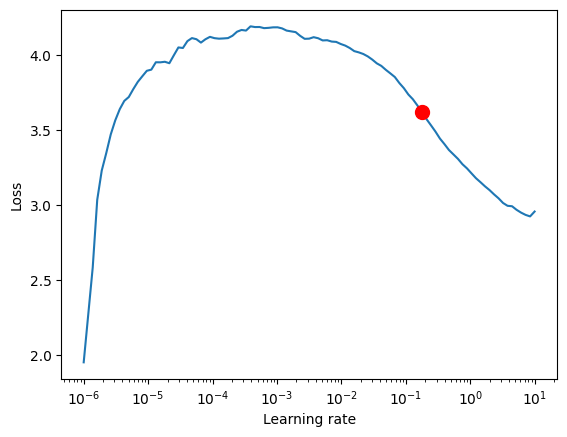

In [32]:
# find optimal learning rate
from lightning.pytorch.tuner import Tuner

res = Tuner(trainer).lr_find(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [34]:
from lightning.pytorch.loggers import TensorBoardLogger

In [35]:
# configure network and trainer
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

trainer = pl.Trainer(
    max_epochs=50,
    accelerator="cpu",
    enable_model_summary=True,
    gradient_clip_val=0.1,
    limit_train_batches=50,  # coment in for training, running valiation every 30 batches
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)

tft = TemporalFusionTransformer.from_dataset(
    dataset,
    learning_rate=0.07,
    hidden_size=16,
    attention_head_size=2,
    dropout=0.1,
    hidden_continuous_size=8,
    loss=QuantileLoss(),
    log_interval=10,  # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches
    optimizer="Ranger",
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of parameters in network: 17.3k


In [36]:
# fit network
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

Missing logger folder: lightning_logs/lightning_logs

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 472   
3  | prescalers                         | ModuleDict                      | 32    
4  | static_variable_selection          | VariableSelectionNetwork        | 0     
5  | encoder_variable_selection         | VariableSelectionNetwork        | 1.8 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.1 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial

Epoch 10: 100%|██████████| 50/50 [00:06<00:00,  7.75it/s, v_num=0, train_loss_step=1.640, val_loss=1.880, train_loss_epoch=1.650]


### Hyperparameter Tuning

In [37]:
import pickle

from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

# create study
study = optimize_hyperparameters(
    train_dataloader,
    val_dataloader,
    model_path="optuna_test",
    n_trials=200,
    max_epochs=50,
    gradient_clip_val_range=(0.01, 1.0),
    hidden_size_range=(8, 128),
    hidden_continuous_size_range=(8, 128),
    attention_head_size_range=(1, 4),
    learning_rate_range=(0.001, 0.1),
    dropout_range=(0.1, 0.3),
    trainer_kwargs=dict(limit_train_batches=30),
    reduce_on_plateau_patience=4,
    use_learning_rate_finder=False,  # use Optuna to find ideal learning rate or use in-built learning rate finder
)

# save study results - also we can resume tuning at a later point in time
with open("test_study.pkl", "wb") as fout:
    pickle.dump(study, fout)

# show best hyperparameters
print(study.best_trial.params)

[I 2023-07-26 11:18:51,050] A new study created in memory with name: no-name-7110a4ed-0aa3-4abf-b537-d248d0d91357
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=50` reached.
[I 2023-07-26 11:21:28,723] Trial 0 finished with value: 2.5346455574035645 and parameters: {'gradient_clip_val': 0.49858273134885345, 'hidden_size': 22, 'dropout': 0.15226966953341803, 'hidden_continuous_size': 10, 'attention_head_size': 3, 'learning_rate': 0.06125578743691916}. Best is trial 0 with value: 2.5346455574035645.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer.fit` stopped: `max_epochs=50` reached.
[I 2023-07-26 11:23:55,876] Trial 1 finished with value: 1.9166759252548218 and parameters: {'gradient_clip_val': 0.01443522795494604, 'hidden_size': 10, 'dropout': 0.

{'gradient_clip_val': 0.019992973396221934, 'hidden_size': 17, 'dropout': 0.2929770645449158, 'hidden_continuous_size': 14, 'attention_head_size': 4, 'learning_rate': 0.00102476920281478}


In [62]:
print(f"Best hyperparameters: \n\tgradient_clip_val_range={study.best_trial.params['gradient_clip_val']} \n\thidden_size_range={study.best_trial.params['hidden_size']} \n\tdropout={study.best_trial.params['dropout']} \n\thidden_continuous_size_range={study.best_trial.params['hidden_continuous_size']} \n\tattention_head_size_range={study.best_trial.params['attention_head_size']} \n\tlearning_rate_range={study.best_trial.params['learning_rate']}")

Best hyperparameters: 
	gradient_clip_val_range=0.019992973396221934 
	hidden_size_range=17 
	dropout=0.2929770645449158 
	hidden_continuous_size_range=14 
	attention_head_size_range=4 
	learning_rate_range=0.00102476920281478


### Evaluate Performance

In [63]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [64]:
best_tft

TemporalFusionTransformer(
  	"attention_head_size":               2
  	"categorical_groups":                {}
  	"causal_attention":                  True
  	"dropout":                           0.1
  	"embedding_labels":                  {'Year': {'2014': 0, '2015': 1, '2016': 2, '2017': 3, '2018': 4, '2019': 5}, 'Month': {'1': 0, '10': 1, '11': 2, '12': 3, '2': 4, '3': 5, '4': 6, '5': 7, '6': 8, '7': 9, '8': 10, '9': 11}, 'Weekday Name': {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}, 'Day': {'1': 0, '10': 1, '11': 2, '12': 3, '13': 4, '14': 5, '15': 6, '16': 7, '17': 8, '18': 9, '19': 10, '2': 11, '20': 12, '21': 13, '22': 14, '23': 15, '24': 16, '25': 17, '26': 18, '27': 19, '28': 20, '29': 21, '3': 22, '30': 23, '31': 24, '4': 25, '5': 26, '6': 27, '7': 28, '8': 29, '9': 30}}
  	"embedding_paddings":                []
  	"embedding_sizes":                   {'Year': (6, 4), 'Month': (12, 6), 'Weekday Name': (7, 5), 'Day': (31,

In [65]:
# calcualte mean absolute error on validation set
predictions = best_tft.predict(val_dataloader, return_y=True, trainer_kwargs=dict(accelerator="cpu"))
MAE()(predictions.output, predictions.y)

tensor(3.4597)

In [66]:
raw_predictions = best_tft.predict(val_dataloader, mode="raw", return_x=True)

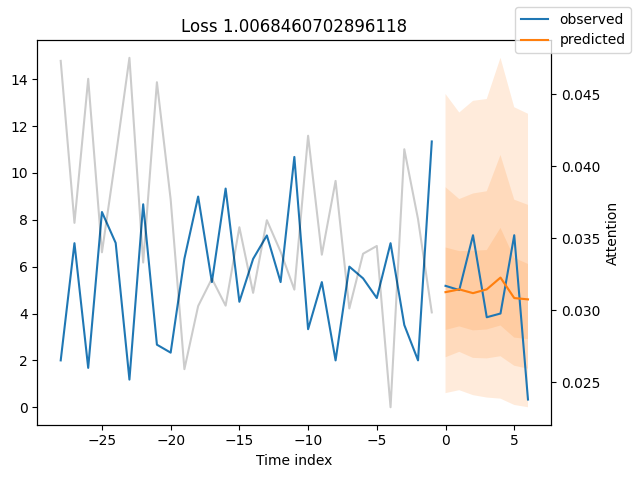

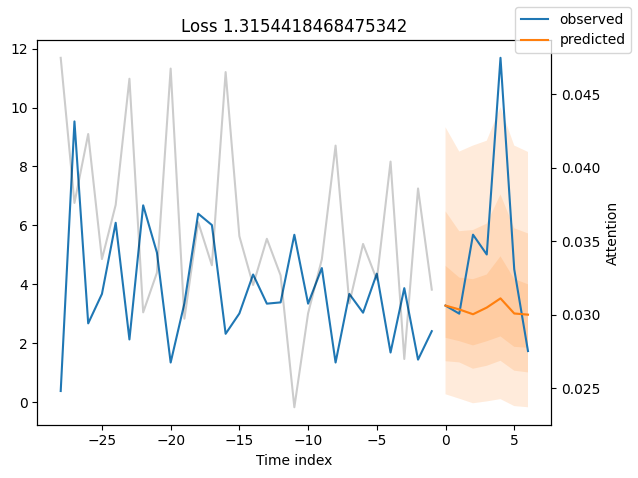

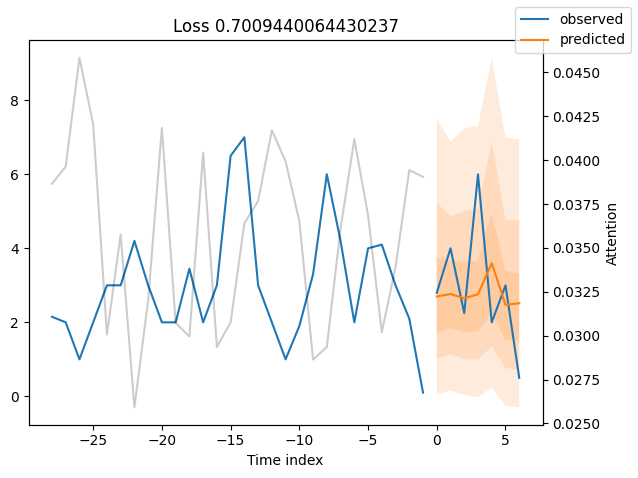

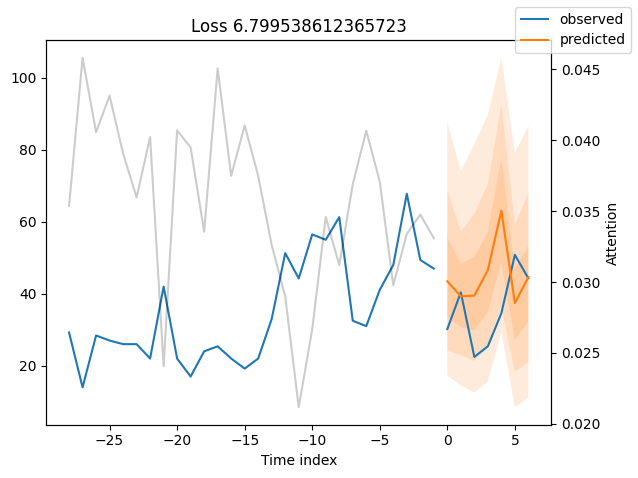

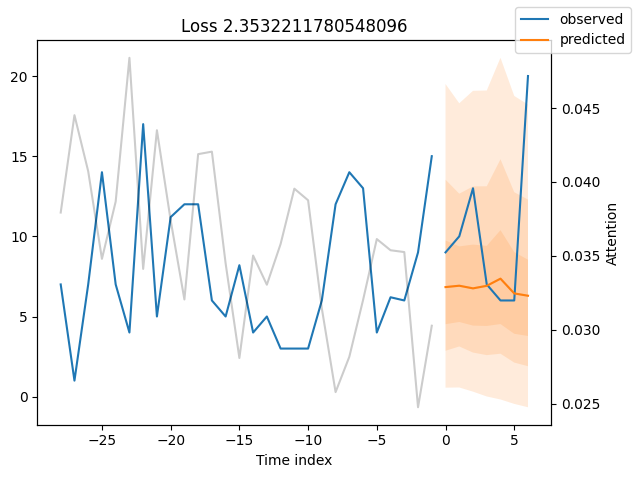

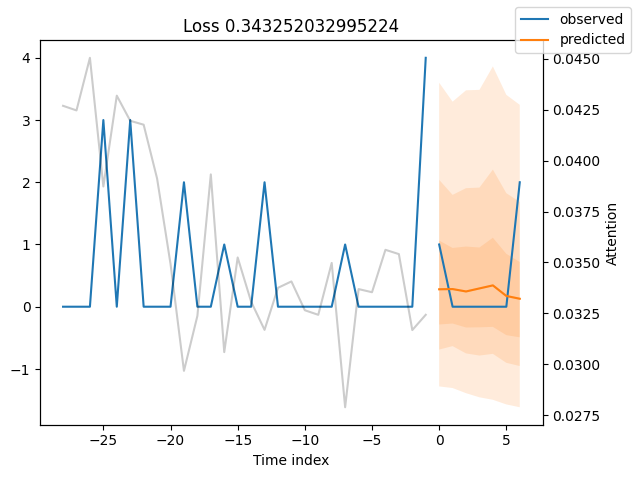

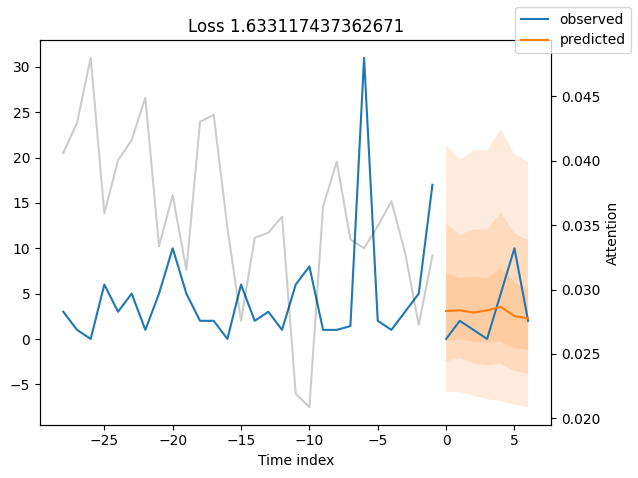

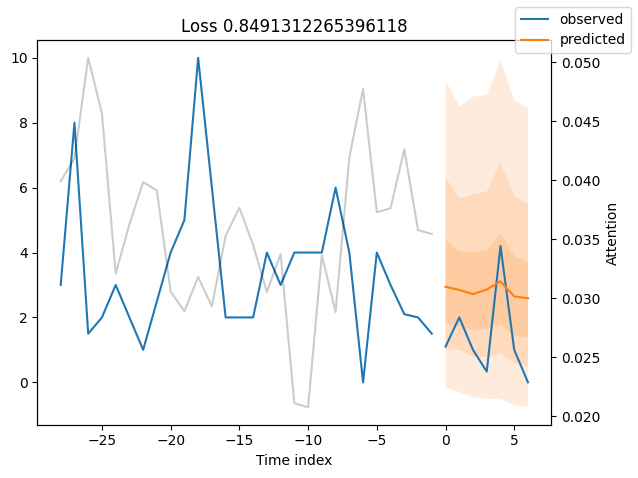

In [81]:
for idx in range(8):  # plot 10 examples
    best_tft.plot_prediction(raw_predictions.x, raw_predictions.output, idx=idx, add_loss_to_title=True)

In [84]:
# worst performer
# calcualte metric by which to display
predictions = best_tft.predict(val_dataloader, return_y=True)
# mean_losses = SMAPE(reduction="none")(predictions.output, predictions.y).mean(1)
# indices = mean_losses.argsort(descending=True)  # sort losses
# for idx in range(8):  # plot 10 examples
#     best_tft.plot_prediction(
#         raw_predictions.x,
#         raw_predictions.output,
#         idx=indices[idx],
#         add_loss_to_title=SMAPE(quantiles=best_tft.loss.quantiles),
#     )


AssertionError: overwrite values variable has to be either in real or categorical variables

{'time_indx': <Figure size 1000x500 with 2 Axes>,
 'sales': <Figure size 1000x500 with 2 Axes>,
 'Year': <Figure size 640x480 with 2 Axes>,
 'Month': <Figure size 1000x500 with 2 Axes>,
 'Weekday Name': <Figure size 640x480 with 2 Axes>,
 'Day': <Figure size 1000x500 with 2 Axes>}

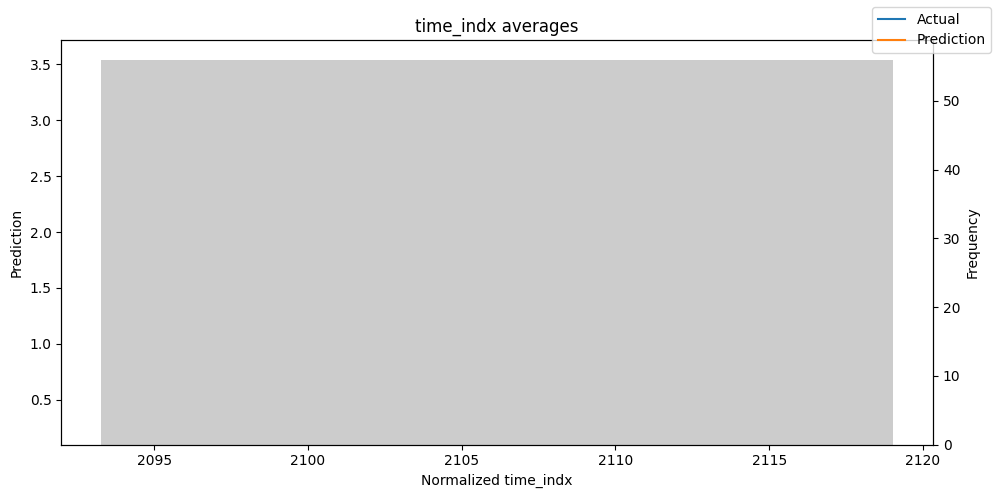

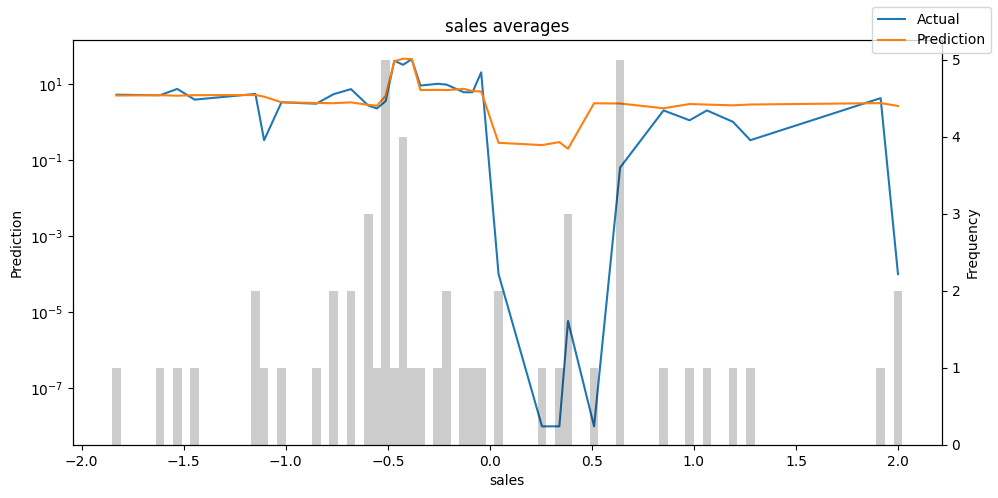

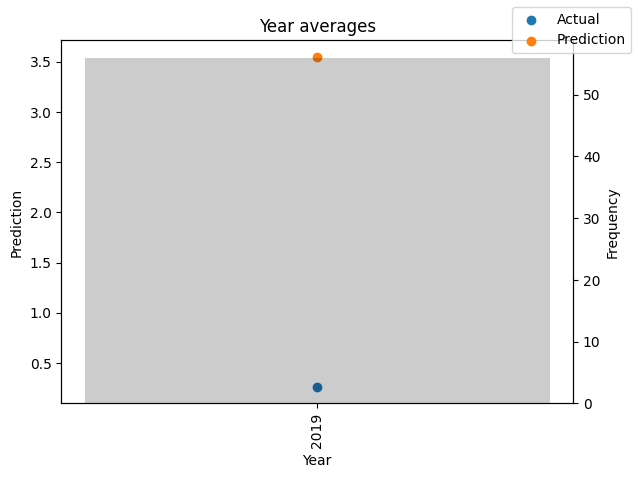

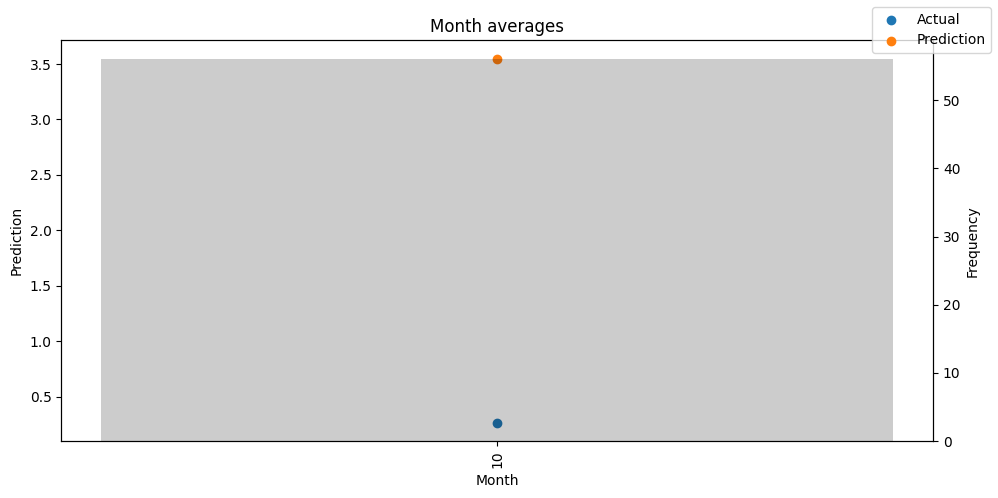

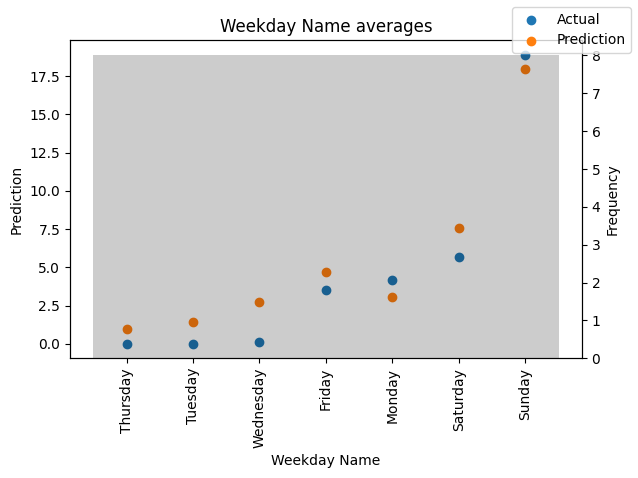

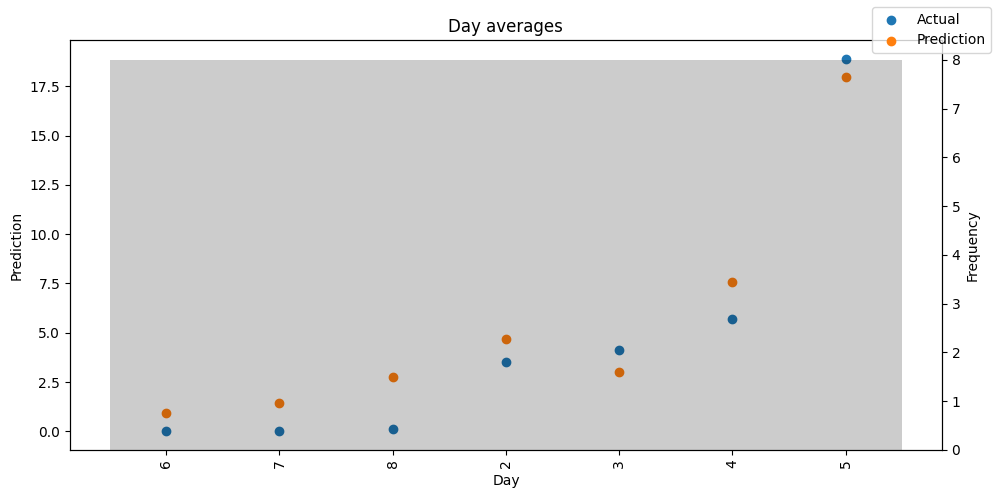

In [73]:
# actual vs predicted by variable
predictions = best_tft.predict(val_dataloader, return_x=True)
predictions_vs_actuals = best_tft.calculate_prediction_actual_by_variable(predictions.x, predictions.output)
best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals)

{'attention': <Figure size 640x480 with 1 Axes>,
 'static_variables': <Figure size 700x200 with 1 Axes>,
 'encoder_variables': <Figure size 700x350 with 1 Axes>,
 'decoder_variables': <Figure size 700x325 with 1 Axes>}

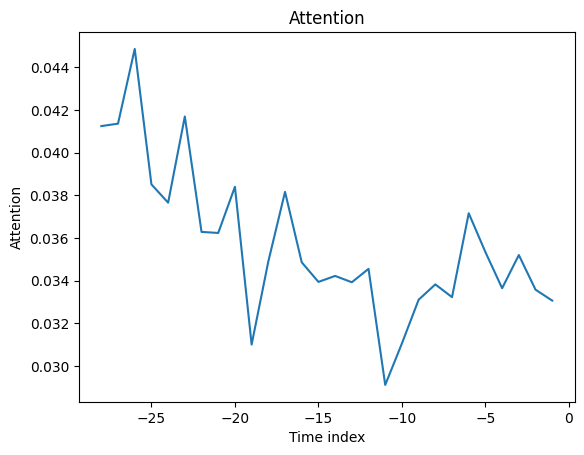

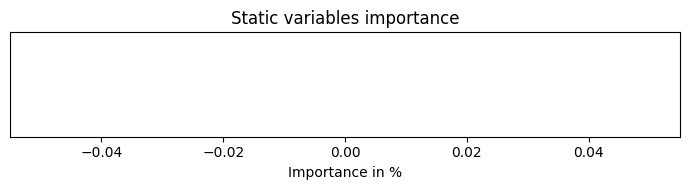

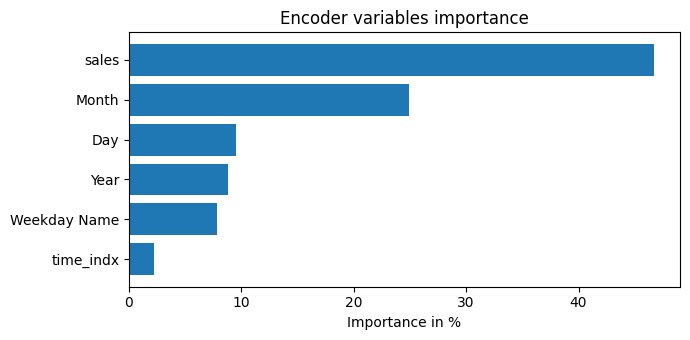

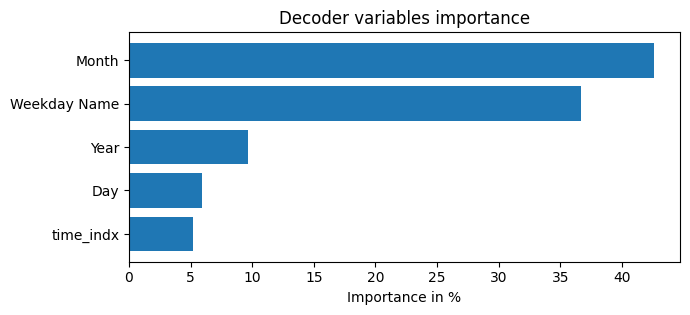

In [74]:
# variable importance
interpretation = best_tft.interpret_output(raw_predictions.output, reduction="sum")
best_tft.plot_interpretation(interpretation)

In [75]:
# partial dependency
dependency = best_tft.predict_dependency(
    val_dataloader.dataset, "discount_in_percent", np.linspace(0, 30, 30), show_progress_bar=True, mode="dataframe"
)

Predict:   0%|          | 0/30 [00:00<?, ? batches/s]

AssertionError: overwrite values variable has to be either in real or categorical variables

In [ ]:
# plotting median and 25% and 75% percentile
agg_dependency = dependency.groupby("discount_in_percent").normalized_prediction.agg(
    median="median", q25=lambda x: x.quantile(0.25), q75=lambda x: x.quantile(0.75)
)
ax = agg_dependency.plot(y="median")
ax.fill_between(agg_dependency.index, agg_dependency.q25, agg_dependency.q75, alpha=0.3)

In [72]:
# predict on selected data
best_tft.predict(
    dataset.filter(lambda x: (x.agency == "Agency_01") & (x.sku == "SKU_01") & (x.time_idx_first_prediction == 15)),
    mode="quantiles",
)

AttributeError: 'DataFrame' object has no attribute 'agency'